In [ ]:
#bert-base-multilingual-uncased
#https://mccormickml.com/2019/07/22/BERT-fine-tuning/
import tensorflow as tf

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

Found GPU at: /device:GPU:0


In [ ]:
#!pip install torch
import torch

# If there's a GPU available...
if torch.cuda.is_available():

    # Tell PyTorch to use the GPU.
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


In [ ]:
!pip install transformers

In [ ]:
import pandas as pd

In [ ]:
# Prepare data
df = pd.read_csv("/content/ready_1.csv")

df.head()

,Unnamed: 0,product_id,product_name,product_category,product_price,review_id,review_author,review_text,rating,text_lower,text_punct,text_stop,text_common,text_rare,text_nonum,text_token,text_ready
0,0,1261049,Десерт Fit Kit глазированный протеиновый Двойн...,Здоровое питание,213.0,3396923,Милана,Самое вкусное протеиновое печенье с белковым с...,5.0,самое вкусное протеиновое печенье с белковым с...,Самое вкусное протеиновое печенье с белковым с...,Самое вкусное протеиновое печенье белковым суф...,Самое вкусное протеиновое печенье белковым суф...,Самое вкусное протеиновое печенье белковым суф...,Самое вкусное протеиновое печенье белковым суф...,"['самое', 'вкусное', 'протеиновое', 'печенье',...",самый вкусный протеиновый печение белков суфле...
1,1,984168,Свеча для торта Paterra Детская Цифра 1,"Дом, дача, книги",97.9,1977331,любовь,"Веселая свечка, но нам пришла розовая, как на ...",5.0,"веселая свечка, но нам пришла розовая, как на ...",Веселая свечка но нам пришла розовая как на фо...,Веселая свечка нам пришла розовая фото буду ис...,Веселая свечка нам пришла розовая фото буду ис...,Веселая свечка нам пришла розовая фото буду ис...,Веселая свечка нам пришла розовая фото буду ис...,"['веселая', 'свечка', 'нам', 'пришла', 'розова...",весёлый свечка мы прийти розовый фото быть иск...
2,2,984168,Свеча для торта Paterra Детская Цифра 1,"Дом, дача, книги",97.9,1451326,инна,Хорошая яркая свечка,5.0,хорошая яркая свечка,Хорошая яркая свечка,Хорошая яркая свечка,Хорошая яркая свечка,Хорошая яркая свечка,Хорошая яркая свечка,"['хорошая', 'яркая', 'свечка']",хороший яркий свечка
3,3,984168,Свеча для торта Paterra Детская Цифра 1,"Дом, дача, книги",97.9,449473,Marina,"Ребенок в восторге от свечек! Она красная, кст...",5.0,"ребенок в восторге от свечек! она красная, кст...",Ребенок в восторге от свечек Она красная кстат...,Ребенок восторге свечек Она красная кстати роз...,Ребенок восторге свечек Она красная кстати роз...,Ребенок восторге свечек Она красная кстати роз...,Ребенок восторге свечек Она красная кстати роз...,"['ребенок', 'восторге', 'свечек', 'она', 'крас...",ребёнок восторг свечка красный кстати розовый ...
4,4,1271460,Сибас филе охлажденное,"Рыба, икра",1779.0,3444792,Роман,"Хорошая рыба, вкусная, свежая. Жаль, что возят...",5.0,"хорошая рыба, вкусная, свежая. жаль, что возят...",Хорошая рыба вкусная свежая Жаль что возят без...,Хорошая рыба вкусная свежая Жаль возят охлажда...,Хорошая рыба вкусная свежая Жаль возят охлажда...,Хорошая рыба вкусная свежая Жаль возят охлажда...,Хорошая рыба вкусная свежая Жаль возят охлажда...,"['хорошая', 'рыба', 'вкусная', 'свежая', 'жаль...",хороший рыба вкусный свежий жаль возить охлажд...


In [ ]:
#import pandas as pd

# Load the dataset into a pandas dataframe.
#df =  pd.read_csv("ready_1.csv")
df = df.dropna()
df.dropna(subset = ['review_text'])
# Report the number of reviews.
print('Number of training reviews: {:,}\n'.format(df.shape[0]))

# Display 10 random rows from the data.
df.tail(10)

Number of training reviews: 12,183



,Unnamed: 0,product_id,product_name,product_category,product_price,review_id,review_author,review_text,rating,text_lower,text_punct,text_stop,text_common,text_rare,text_nonum,text_token,text_ready
12356,12356,461103,Икра Царская лососевая имитированная 220г,"Рыба, икра",109.0,1416000,Ольга,Из имитированных красных икр эта мне нравится ...,5.0,из имитированных красных икр эта мне нравится ...,Из имитированных красных икр эта мне нравится ...,Из имитированных красных икр эта нравится Нет ...,Из имитированных красных икр эта нравится Нет ...,Из имитированных красных икр эта нравится Нет ...,Из имитированных красных икр эта нравится Нет ...,"['из', 'имитированных', 'красных', 'икр', 'эта...",имитировать красный икра этот нравиться весь п...
12357,12357,461103,Икра Царская лососевая имитированная 220г,"Рыба, икра",109.0,1403171,Елена,Очень любим. Только цена уж очень высока стала...,5.0,очень любим. только цена уж очень высока стала...,Очень любим Только цена уж очень высока стала ...,Очень любим Только цена очень высока стала Бер...,любим Только цена высока стала Берём акции,любим Только цена высока стала Берём акции,любим Только цена высока стала Берём акции,"['любим', 'только', 'цена', 'высока', 'стала',...",очень любим цена очень высокий стать брать акция
12358,12358,461103,Икра Царская лососевая имитированная 220г,"Рыба, икра",109.0,1369850,Светлана,Фигня. Брала для украшений блюд. На зубах скол...,3.0,фигня. брала для украшений блюд. на зубах скол...,Фигня Брала для украшений блюд На зубах скольз...,Фигня Брала украшений блюд На зубах скользит н...,Фигня Брала украшений блюд На зубах скользит н...,Фигня Брала украшений блюд На зубах скользит н...,Фигня Брала украшений блюд На зубах скользит н...,"['фигня', 'брала', 'украшений', 'блюд', 'на', ...",фигня брать украшение блюдо зуб скользить наст...
12359,12359,461103,Икра Царская лососевая имитированная 220г,"Рыба, икра",109.0,1361581,Клиент,Натуральный вкус,5.0,натуральный вкус,Натуральный вкус,Натуральный вкус,Натуральный,Натуральный,Натуральный,['натуральный'],натуральный вкус
12360,12360,461103,Икра Царская лососевая имитированная 220г,"Рыба, икра",109.0,1334312,Татьяна,"Нормальное качество, для салата вполне годится...",4.0,"нормальное качество, для салата вполне годится...",Нормальное качество для салата вполне годится ...,Нормальное качество салата вполне годится И вк...,Нормальное качество салата вполне годится И ви...,Нормальное качество салата вполне годится И ви...,Нормальное качество салата вполне годится И ви...,"['нормальное', 'качество', 'салата', 'вполне',...",нормальный качество салат вполне годиться вкус...
12361,12361,461103,Икра Царская лососевая имитированная 220г,"Рыба, икра",109.0,1333017,Виктория,"По структуре икринки отличные, одна км одной, ...",5.0,"по структуре икринки отличные, одна км одной, ...",По структуре икринки отличные одна км одной ло...,По структуре икринки отличные одна км одной ло...,По структуре икринки отличные одна км одной ло...,По структуре икринки отличные одна км одной ло...,По структуре икринки отличные одна км одной ло...,"['по', 'структуре', 'икринки', 'отличные', 'од...",структура икринка отличный один км один лопать...
12362,12362,461103,Икра Царская лососевая имитированная 220г,"Рыба, икра",109.0,1325256,Екатерина,Очень странная штука. Взяли именно из любопытс...,5.0,очень странная штука. взяли именно из любопытс...,Очень странная штука Взяли именно из любопытст...,Очень странная штука Взяли именно любопытства ...,странная штука Взяли именно любопытства напряг...,странная штука Взяли именно любопытства напряг...,странная штука Взяли именно любопытства напряг...,"['странная', 'штука', 'взяли', 'именно', 'любо...",очень странный штука взять именно любопытство ...
12363,12363,461103,Икра Царская лососевая имитированная 220г,"Рыба, икра",109.0,1314691,Ольга,"Какой-то непонятный цвет выделяется , видимо к...",4.0,"какой-то непонятный цвет выделяется , видимо к...",Какойто непонятный цвет выделяется видимо кра...,Какойто непонятный

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import re
# Удаление эмодзи
def emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)
#Удаление URL

def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)
#Удаление HTML-тегов
from bs4 import BeautifulSoup
#Function for removing html
def html(text):
    return BeautifulSoup(text, "lxml").text

In [ ]:
df = df.sample(frac=1)
df = df.head(1500)
df.head(10)

,Unnamed: 0,product_id,product_name,product_category,product_price,review_id,review_author,review_text,rating,text_lower,text_punct,text_stop,text_common,text_rare,text_nonum,text_token,text_ready
4771,4771,888593,Конфеты ПРОСТО Александровские Сливочные 400г,Сладости,165.00,1954048,Людмила,"Не приторные, мягкие, не липнут к зубам.",5.0,"не приторные, мягкие, не липнут к зубам.",Не приторные мягкие не липнут к зубам,Не приторные мягкие липнут зубам,приторные мягкие липнут зубам,приторные мягкие липнут зубам,приторные мягкие липнут зубам,"['приторные', 'мягкие', 'липнут', 'зубам']",приторный мягкий липнуть зуб
7584,7584,345495,Макароны Ameria Классические №9 400г,"Макароны, крупы, специи",39.90,3330953,Наталья,Очень-очень вкусные! \nВкус именно чувствуется...,5.0,очень-очень вкусные! \nвкус именно чувствуется...,Оченьочень вкусные \nВкус именно чувствуется ...,Оченьочень вкусные Вкус именно чувствуется кон...,Оченьочень Вкус именно чувствуется консистенци...,Оченьочень Вкус именно чувствуется консистенци...,Оченьочень Вкус именно чувствуется консистенци...,"['оченьочень', 'вкус', 'именно', 'чувствуется'...",очень очень вкусный вкус именно чувствоваться ...
5351,5351,345485,Колбаса Вязанка со шпиком вареная 500г,"Мясо, птица, колбасы",314.00,3383188,Егор,"Заказал и снова не пожалел, всегда высокое кач...",5.0,"заказал и снова не пожалел, всегда высокое кач...",Заказал и снова не пожалел всегда высокое каче...,Заказал снова пожалел высокое качество,Заказал снова пожалел высокое качество,Заказал снова пожалел высокое качество,Заказал снова пожалел высокое качество,"['заказал', 'снова', 'пожалел', 'высокое', 'ка...",заказать снова пожалеть высокий качество
9983,9983,673390,Масло сливочное Маркет Зеленая Линия Традицион...,Здоровое питание,209.90,1578453,Клиент,"Масло хорошего качество, вкусное",5.0,"масло хорошего качество, вкусное",Масло хорошего качество вкусное,Масло хорошего качество вкусное,Масло хорошего качество вкусное,Масло хорошего качество вкусное,Масло хорошего качество вкусное,"['масло', 'хорошего', 'качество', 'вкусное']",масло хороший качество вкусный
1570,1570,319226,Освежитель воздуха Glade Цветочное совершенств...,Бытовая химия и гигиена,119.00,675075,Анатолий Путов,"Хороший, недорогой, с большим содержанием лите...",4.0,"хороший, недорогой, с большим содержанием лите...",Хороший недорогой с большим содержанием литера...,Хороший недорогой большим содержанием литературы,Хороший недорогой большим содержанием литературы,Хороший недорогой большим содержанием литературы,Хороший недорогой большим содержанием литературы,"['хороший', 'недорогой', 'большим', 'содержани...",хороший недорогой больший содержание литература
6306,6306,1131487,Окорочка куриные,"Мясо, птица, колбасы",219.00,1708449,Наталья,Хорошие окорочка...Советую...,5.0,хорошие окорочка...советую...,Хорошие окорочкаСоветую,Хорошие окорочкаСоветую,Хорошие окорочкаСоветую,Хорошие окорочкаСоветую,Хорошие окорочкаСоветую,"['хорошие', 'окорочкасоветую']",хороший окорочка советовать
6148,6148,1131487,Окорочка куриные,"Мясо, птица, колбасы",219.00,3133124,Андрей,"Свежие, крупные. Вкусные",4.0,"свежие, крупные. вкусные",Свежие крупные Вкусные,Свежие крупные Вкусные,Свежие крупные Вкусные,Свежие крупные Вкусные,Свежие крупные Вкусные,"['свежие', 'крупные', 'вкусные']",свежий крупный вкусный
2482,2482,1077305,Средство для мытья посуды Fairy Platinum Арбуз...,Бытовая химия и гигиена,149.00,1252061,Инга,О этот аромат. Прям реально сочный арбуз. Эта ...,5.0,о этот аромат. прям реально сочный арбуз. эта ...,О этот аромат Прям реально сочный арбуз Эта но...,О аромат Прям реально сочный арбуз Эта новинка...,О аромат Прям реально сочный арбуз Эта новинка...,О аромат Прям реально сочный арбуз Эта новинка...,О аромат Прям реально сочный арбуз Эта новинка...,"['о', 'аромат', 'прям', 'реально', 'сочный', '...",аромат прям реально сочный арбуз этот новинка ...
2821,2821,311771,Кукуруза сладкая в початках вареная 2шт упаковка,"Овощи, фрукты, ягоды",149.00,1965291,Наталья,"Очень удоб

In [ ]:
data = df['product_category']
data.head()
d1 = list(data)
print(d1)
d01 = list(set(data))
print(d01)
for i in range(len(d01)):
  tag = d01[i]
  data2 = df[df['product_category']==tag]
  d3 = len(data2)
  print(d01[i], '-', d3, '\n')

['Сладости', 'Макароны, крупы, специи', 'Мясо, птица, колбасы', 'Здоровое питание', 'Бытовая химия и гигиена', 'Мясо, птица, колбасы', 'Мясо, птица, колбасы', 'Бытовая химия и гигиена', 'Овощи, фрукты, ягоды', 'Чай, кофе, сахар', 'Макароны, крупы, специи', 'Овощи, фрукты, ягоды', 'Сладости', 'Молоко, сыр, яйца', 'Рыба, икра ', 'Готовая еда', 'Мясо, птица, колбасы', 'Воды, соки, напитки', 'Мясо, птица, колбасы', 'Зоотовары', 'Красота и здоровье', 'Рыба, икра ', 'Красота и здоровье', 'Замороженные продукты', 'Воды, соки, напитки', 'Макароны, крупы, специи', 'Мясо, птица, колбасы', 'Молоко, сыр, яйца', 'Молоко, сыр, яйца', 'Овощи, фрукты, ягоды', 'Овощи, фрукты, ягоды', 'Замороженные продукты', 'Молоко, сыр, яйца', 'Дом, дача, книги', 'Мясо, птица, колбасы', 'Мясо, птица, колбасы', 'Молоко, сыр, яйца', 'Хлеб и выпечка', 'Овощи, фрукты, ягоды', 'Молоко, сыр, яйца', 'Молоко, сыр, яйца', 'Сладости', 'Здоровое питание', 'Здоровое питание', 'Макароны, крупы, специи', 'Дом, дача, книги', 'Замор

In [86]:
# Get the lists of sentences and their labels.
def categorise(row):
    if row['product_category'] == 'сладости':
        return 0
    elif row['product_category'] == 'Красота и здоровье':
        return 1
    elif row['product_category'] == 'Молоко, сыр, яйца':
        return 2
df=df.dropna()
df = df[df['product_category'] != 'Молоко, сыр, яйца']
df['text_ready'] = df['review_text'].apply(emoji)
df['text_ready'] = df['text_ready'].apply(remove_urls)
df['text_ready'] = df['text_ready'].apply(html)
df[['text_ready']].head()
df['labels'] = df.apply(lambda row: categorise(row), axis=1)

In [87]:
df.sample(10)

,Unnamed: 0,product_id,product_name,product_category,product_price,review_id,review_author,review_text,rating,text_lower,text_punct,text_stop,text_common,text_rare,text_nonum,text_token,text_ready,labels
7677,7677,965217,Прокладки Ola! Daily deo Ромашка ежедневные 60шт,Красота и здоровье,169.99,1647947,Лариса,"Успела купить по хорошей цене, уже нигде не бы...",5.0,"успела купить по хорошей цене, уже нигде не бы...",Успела купить по хорошей цене уже нигде не был...,Успела купить хорошей цене нигде ажиотаж,Успела купить хорошей цене нигде ажиотаж,Успела купить хорошей цене нигде ажиотаж,Успела купить хорошей цене нигде ажиотаж,"['успела', 'купить', 'хорошей', 'цене', 'нигде...","Успела купить по хорошей цене, уже нигде не бы...",1
6479,6479,373613,Кассеты для бритья Gillette Mach3 8шт,Красота и здоровье,1899.00,2011042,Виктория,"Хорошие! Отлично бреют. Думаю, оригинал.",5.0,"хорошие! отлично бреют. думаю, оригинал.",Хорошие Отлично бреют Думаю оригинал,Хорошие Отлично бреют Думаю оригинал,Хорошие Отлично бреют Думаю оригинал,Хорошие Отлично бреют Думаю оригинал,Хорошие Отлично бреют Думаю оригинал,"['хорошие', 'отлично', 'бреют', 'думаю', 'ориг...","Хорошие! Отлично бреют. Думаю, оригинал.",1
3886,3886,447473,Гель-уход для душа Nivea Крем и апельсин 750мл,Красота и здоровье,490.00,12899,Наталья,Очень удобный и выгодный формат для семейного ...,5.0,очень удобный и выгодный формат для семейного ...,Очень удобный и выгодный формат для семейного ...,Очень удобный выгодный формат семейного исполь...,удобный выгодный формат семейного использовани...,удобный выгодный формат семейного использовани...,удобный выгодный формат семейного использовани...,"['удобный', 'выгодный', 'формат', 'семейного',...",Очень удобный и выгодный формат для семейного ...,1
4482,4482,305462,Прокладки Naturella Ultra Camomile Normal 10шт,Красота и здоровье,119.00,97067,Yara Yakov,Бюджетно и удобно,5.0,бюджетно и удобно,Бюджетно и удобно,Бюджетно удобно,Бюджетно удобно,Бюджетно удобно,Бюджетно удобно,"['бюджетно', 'удобно']",Бюджетно и удобно,1
4527,4527,315217,Спрей тонирующий для волос Loreal Paris Magic ...,Красота и здоровье,299.00,594262,Ирина,"Очень хороший спрей ,очень выручает,можно расп...",5.0,"очень хороший спрей ,очень выручает,можно расп...",Очень хороший спрей очень выручаетможно распыл...,Очень хороший спрей очень выручаетможно распыл...,хороший спрей выручаетможно распылить прическа...,хороший спрей выручаетможно распылить прическа...,хороший спрей выручаетможно распылить прическа...,"['хороший', 'спрей', 'выручаетможно', 'распыли...","Очень хороший спрей ,очень выручает,можно расп...",1
6511,6511,373613,Кассеты для бритья Gillette Mach3 8шт,Красота и здоровье,1899.00,197273,Алексей Мишанов,Достоинства:\nэто жилет! \n\nНедостатки:\nЦЕНА...,4.0,достоинства:\nэто жилет! \n\nнедостатки:\nцена...,Достоинства\nэто жилет \n\nНедостатки\nЦЕНА ...,Достоинства это жилет Недостатки ЦЕНА нормальн...,жилет ЦЕНА нормальные кассеты,жилет ЦЕНА нормальные кассеты,жилет ЦЕНА нормальные кассеты,"['жилет', 'цена', 'нормальные', 'кассеты']",Достоинства:\nэто жилет! \n\nНедостатки:\nЦЕНА...,1
209,209,311614,Прокладки Bella Perfecta Ultra Rose 10шт,Красота и здоровье,129.00,147459,Victoria Alexeeva,"Хорошие, не протекла, приятно пахнут, стоят не...",5.0,"хорошие, не протекла, приятно пахнут, стоят не...",Хорошие не протекла приятно пахнут стоят не до...,Хорошие протекла приятно пахнут стоят дорого с...,Хорошие протекла приятно пахнут стоят дорого с...,Хорошие протекла приятно пахнут стоят дорого с...,Хорошие протекла приятно пахнут стоят дорого с...,"['хорошие', 'протекла', 'приятно', 'пахнут', '...","Хорошие, не протекла, приятно пахнут, стоят не...",1
7683,7683,965217,Прокладки Ola! Daily deo Ромашка ежедневные 60шт,Красота и здоровье,169.99,986986,евгения,"Советская Вероника, если помните такие проклад...",3.0,"советская вероника, если помните такие проклад...",Советская Вероника если помните такие прокладк...,Советская Вероника помните такие прокладки Сми...,Сове

In [88]:
df.head(10)

,Unnamed: 0,product_id,product_name,product_category,product_price,review_id,review_author,review_text,rating,text_lower,text_punct,text_stop,text_common,text_rare,text_nonum,text_token,text_ready,labels
99,99,453359,Дезодорант шариковый Fa Ритмы острова Бали Del...,Красота и здоровье,209.00,413378,Наталья,Приятный аромат и на этом всё... Не справляетс...,3.0,приятный аромат и на этом всё... не справляетс...,Приятный аромат и на этом всё Не справляется с...,Приятный аромат всё Не справляется своей задачей,Приятный аромат всё справляется своей задачей,Приятный аромат всё справляется своей задачей,Приятный аромат всё справляется своей задачей,"['приятный', 'аромат', 'всё', 'справляется', '...",Приятный аромат и на этом всё... Не справляетс...,1
5930,5930,1019577,Крем для рук Himalays Herbals Молодость кожи 75мл,Красота и здоровье,296.00,869644,Алина,"Вкусно пахнет, совсем не по-индийский (хоть я...",5.0,"вкусно пахнет, совсем не по-индийский (хоть я...",Вкусно пахнет совсем не поиндийский хоть я и ...,Вкусно пахнет поиндийский люблю запахи индийск...,Вкусно пахнет поиндийский люблю запахи индийск...,Вкусно пахнет поиндийский люблю запахи индийск...,Вкусно пахнет поиндийский люблю запахи индийск...,"['вкусно', 'пахнет', 'поиндийский', 'люблю', '...","Вкусно пахнет, совсем не по-индийский (хоть я...",1
3905,3905,313641,Прокладки Ola! Daily ежедневные 60шт,Красота и здоровье,169.99,3274277,Екатерина,В полне себе приличные.,5.0,в полне себе приличные.,В полне себе приличные,В полне приличные,В полне приличные,В полне приличные,В полне приличные,"['в', 'полне', 'приличные']",В полне себе приличные.,1
7298,7298,1275745,Гель для душа BioMio Bio Shower Gel с эфирным ...,Красота и здоровье,545.00,3439702,Марина,"Запах еле уловимый, пенится классно",5.0,"запах еле уловимый, пенится классно",Запах еле уловимый пенится классно,Запах еле уловимый пенится классно,Запах еле уловимый пенится классно,Запах еле уловимый пенится классно,Запах еле уловимый пенится классно,"['запах', 'еле', 'уловимый', 'пенится', 'класс...","Запах еле уловимый, пенится классно",1
3357,3357,417573,Прокладки ПРОСТО Classic Soft ежедневные 20шт,Красота и здоровье,49.90,1835135,Виктория,Отличные прокладки! Ничем не хуже дорогих. Со ...,5.0,отличные прокладки! ничем не хуже дорогих. со ...,Отличные прокладки Ничем не хуже дорогих Со св...,Отличные прокладки Ничем хуже дорогих Со своей...,Отличные прокладки Ничем хуже дорогих Со своей...,Отличные прокладки Ничем хуже дорогих Со своей...,Отличные прокладки Ничем хуже дорогих Со своей...,"['отличные', 'прокладки', 'ничем', 'хуже', 'до...",Отличные прокладки! Ничем не хуже дорогих. Со ...,1
6483,6483,373613,Кассеты для бритья Gillette Mach3 8шт,Красота и здоровье,1899.00,1385729,Пётр,Сменные кассеты Gillette Mach 3 я покупаю регу...,5.0,сменные кассеты gillette mach 3 я покупаю регу...,Сменные кассеты Gillette Mach 3 я покупаю регу...,Сменные кассеты Gillette Mach 3 покупаю регуля...,Сменные кассеты Gillette Mach 3 покупаю регуля...,Сменные кассеты Gillette Mach 3 покупаю регуля...,Сменные кассеты Gillette Mach 3 покупаю регуля...,"['сменные', 'кассеты', 'gillette', 'mach', '3'...",Сменные кассеты Gillette Mach 3 я покупаю регу...,1
10572,10572,673873,Мицеллярный гель для снятия макияжа Dove с мас...,Красота и здоровье,219.00,1316326,Наталья,Хорошо снимает макияж,5.0,хорошо снимает макияж,Хорошо снимает макияж,Хорошо снимает макияж,Хорошо снимает макияж,Хорошо снимает макияж,Хорошо снимает макияж,"['хорошо', 'снимает', 'макияж']",Хорошо снимает макияж,1
5291,5291,981753,Крем для рук Consly Dessert Time с ароматом кл...,Красота и здоровье,223.00,454749,Наталья,"Запах не понравился, крем на руках жирный, а к...",2.0,"запах не понравился, крем на руках жирный, а к...",Запах не понравился крем на руках жирный а ког...,Запах понравился крем руках жирный эффект прох...,Запах понравился крем руках жирный эффект прох...,Запах понравился крем руках жирный эффект прох...,Запах понравился крем руках жирный эффект прох...,"['запах', 'по

In [89]:
df.loc[df.labels == 1].sample(5)[['text_ready', 'labels']]

,text_ready,labels
3004,Достоинства:\nудобные и ноги сухие\n,1
2202,"Потрясающий аромат, не надоедает",1
50,Супер! Загар ложится ровно без разводов. Не бе...,1
249,Чаще всего из линейки Дискрит бету именно эти....,1
10572,Хорошо снимает макияж,1


In [90]:
# Get the lists of sentences and their labels.
sentences = df.text_ready.values
labels = df.labels.values

In [91]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-uncased', do_lower_case=True)

Loading BERT tokenizer...


In [92]:
max_len = 0

# For every sentence...
for sent in sentences:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent, add_special_tokens=True)

    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))

print('Max sentence length: ', max_len)

Max sentence length:  390


In [93]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 64,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        truncation=True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )

    # Add the encoded sentence to the list.
    input_ids.append(encoded_dict['input_ids'])

    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])

Original:  Приятный аромат и на этом всё... Не справляется со своей задачей ...
Token IDs: tensor([  101, 10842, 13005, 11440, 34399, 24556, 10386,   315, 10124, 14907,
        12506,   119,   119,   119, 10396, 61409, 45396, 11041, 16956, 73577,
        11850,   119,   119,   119,   102,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0])


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2834: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [94]:
from torch.utils.data import TensorDataset, random_split

# Combine the training inputs into a TensorDataset.
dataset = TensorDataset(input_ids, attention_masks, labels)

# Create a 90-10 train-validation split.

# Calculate the number of samples to include in each set.
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size

# Divide the dataset by randomly selecting samples.
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

  111 training samples
   13 validation samples


In [95]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it
# here. For fine-tuning BERT on a specific task, the authors recommend a batch
# size of 16 or 32.
batch_size = 32

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order.
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

In [96]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single
# linear classification layer on top.
model = BertForSequenceClassification.from_pretrained(
    "bert-base-multilingual-uncased",
    num_labels = 2, # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model.cuda()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(105879, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1

In [97]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 201 different named parameters.

==== Embedding Layer ====

bert.embeddings.word_embeddings.weight                  (105879, 768)
bert.embeddings.position_embeddings.weight                (512, 768)
bert.embeddings.token_type_embeddings.weight                (2, 768)
bert.embeddings.LayerNorm.weight                              (768,)
bert.embeddings.LayerNorm.bias                                (768,)

==== First Transformer ====

bert.encoder.layer.0.attention.self.query.weight          (768, 768)
bert.encoder.layer.0.attention.self.query.bias                (768,)
bert.encoder.layer.0.attention.self.key.weight            (768, 768)
bert.encoder.layer.0.attention.self.key.bias                  (768,)
bert.encoder.layer.0.attention.self.value.weight          (768, 768)
bert.encoder.layer.0.attention.self.value.bias                (768,)
bert.encoder.layer.0.attention.output.dense.weight        (768, 768)
bert.encoder.layer.0.attention.output.dense.bias              

In [98]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch)
# I believe the 'W' stands for 'Weight Decay fix"
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [99]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs. The BERT authors recommend between 2 and 4.
epochs = 3

# Total number of training steps is [number of batches] x [number of epochs].
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [100]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [101]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))

    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))


In [102]:
import random
import numpy as np

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss,
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):

    # ========================================
    #               Training
    # ========================================

    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    # Put the model into training mode. Don't be mislead--the call to
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)

            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader.
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids
        #   [1]: attention masks
        #   [2]: labels
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because
        # accumulating the gradients is "convenient while training RNNs".
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()

        # Perform a forward pass (evaluate the model on this training batch).
        # In PyTorch, calling `model` will in turn call the model's `forward`
        # function and pass down the arguments. The `forward` function is
        # documented here:
        # https://huggingface.co/transformers/model_doc/bert.html#bertforsequenceclassification
        # The results are returned in a results object, documented here:
        # https://huggingface.co/transformers/main_classes/output.html#transformers.modeling_outputs.SequenceClassifierOutput
        # Specifically, we'll get the loss (because we provided labels) and the
        # "logits"--the model outputs prior to activation.
        result = model(b_input_ids,
                       token_type_ids=None,
                       attention_mask=b_input_mask,
                       labels=b_labels,
                       return_dict=True)

        loss = result.loss
        logits = result.logits

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value
        # from the tensor.
        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)

    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))

    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:

        # Unpack this training batch from our dataloader.
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using
        # the `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids
        #   [1]: attention masks
        #   [2]: labels
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():

            # Forward pass, calculate logit predictions.
            # token_type_ids is the same as the "segment ids", which
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            result = model(b_input_ids,
                           token_type_ids=None,
                           attention_mask=b_input_mask,
                           labels=b_labels,
                           return_dict=True)

        # Get the loss and "logits" output by the model. The "logits" are the
        # output values prior to applying an activation function like the
        # softmax.
        loss = result.loss
        logits = result.logits

        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)


    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)

    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)

    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 3 ========
Training...

  Average training loss: 0.65
  Training epcoh took: 0:00:02

Running Validation...
  Accuracy: 1.00
  Validation Loss: 0.42
  Validation took: 0:00:00

======== Epoch 2 / 3 ========
Training...

  Average training loss: 0.30
  Training epcoh took: 0:00:01

Running Validation...
  Accuracy: 1.00
  Validation Loss: 0.16
  Validation took: 0:00:00

======== Epoch 3 / 3 ========
Training...

  Average training loss: 0.13
  Training epcoh took: 0:00:01

Running Validation...
  Accuracy: 1.00
  Validation Loss: 0.10
  Validation took: 0:00:00

Training complete!
Total training took 0:00:04 (h:mm:ss)


In [107]:
#summary of the training process
import pandas as pd

# Display floats with two decimal places.
pd.set_option('display.precision', 2)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

# Display the table.
df_stats

,Training Loss,Valid. Loss,Valid. Accur.,Training Time,Validation Time
epoch,,,,,
1,0.65,0.42,1.0,0:00:02,0:00:00
2,0.30,0.16,1.0,0:00:01,0:00:00
3,0.13,0.10,1.0,0:00:01,0:00:00


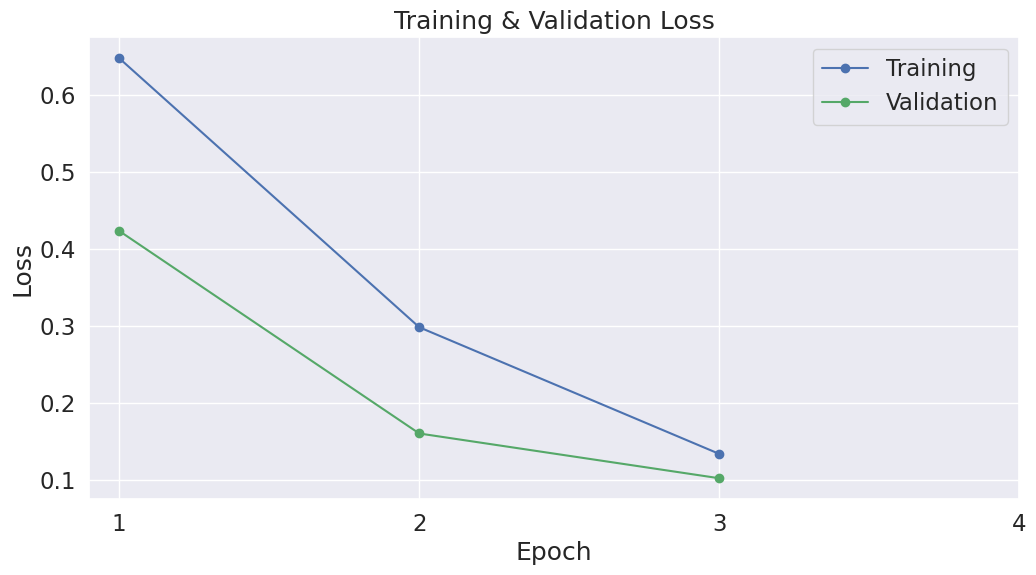

In [108]:
import matplotlib.pyplot as plt
#% matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4])

plt.show()